In [1]:
from noisypy.data.datasets.noisylabels import NoisyLabelsLoader
import matplotlib.pyplot as plt
import numpy as np

CIFAR10_LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
nll = NoisyLabelsLoader("cifar10", "../../../data/noisylabels", download=True)

clean_labels = nll.load_label("clean_label")
aggre_labels = nll.load_label("aggre_label")
random1_labels = nll.load_label("random_label1")
worst_labels = nll.load_label("worse_label")

cmat_aggre = np.zeros((10, 10), dtype=float)
cmat_rand1 = np.zeros((10, 10), dtype=float)
cmat_worst = np.zeros((10, 10), dtype=float)
for i in range(10):
    for j in range(10):
        cmat_aggre[i, j] = (clean_labels == i)[aggre_labels == j].sum()
        cmat_rand1[i, j] = (clean_labels == i)[random1_labels == j].sum()
        cmat_worst[i, j] = (clean_labels == i)[worst_labels == j].sum()

cmat_aggre_norm = cmat_aggre / cmat_aggre.sum(axis=1, keepdims=True)
cmat_rand1_norm = cmat_rand1 / cmat_rand1.sum(axis=1, keepdims=True)
cmat_worst_norm = cmat_worst / cmat_worst.sum(axis=1, keepdims=True)

cmat_aggre_norm[cmat_aggre_norm == 0] = np.nan
cmat_rand1_norm[cmat_rand1_norm == 0] = np.nan
cmat_worst_norm[cmat_worst_norm == 0] = np.nan

Label file already downloaded and verified.


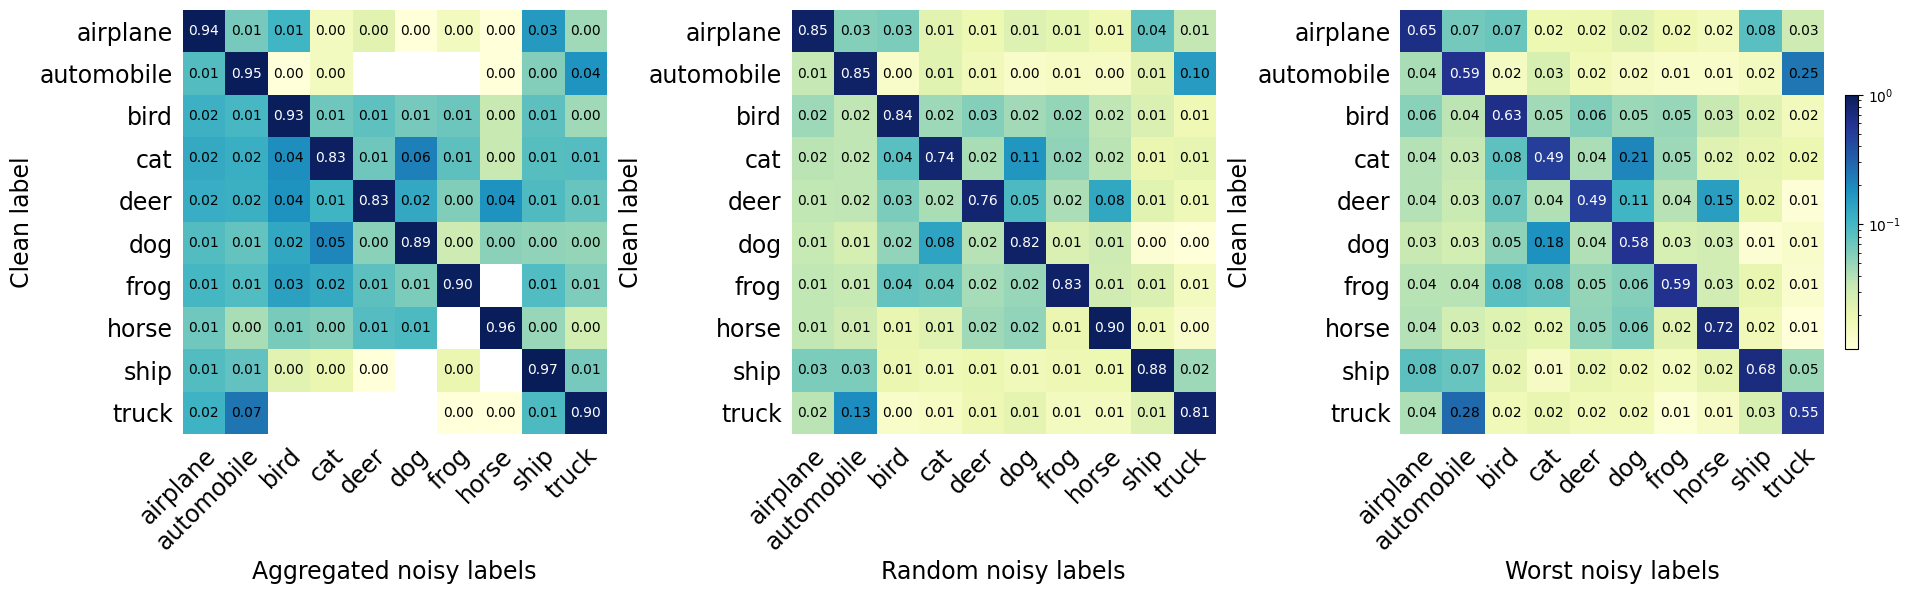

In [2]:
fig, ax = plt.subplots(1,3, figsize=(19, 6), layout='constrained')

cax =  ax[0].matshow(cmat_aggre_norm, cmap="YlGnBu",norm='log', vmax=1)
cax1 = ax[1].matshow(cmat_rand1_norm, cmap="YlGnBu",norm='log', vmax=1)
cax2 = ax[2].matshow(cmat_worst_norm, cmap="YlGnBu",norm='log', vmax=1)
fig.colorbar(cax2, orientation='vertical', fraction=0.03)

# add text
for i in range(10):
    for j in range(10):
        ax[0].text(j, i, f"{cmat_aggre_norm[i, j]:.2f}", ha='center', va='center', color='black' if cmat_aggre_norm[i, j] < 0.3 else 'white')
        ax[1].text(j, i, f"{cmat_rand1_norm[i, j]:.2f}", ha='center', va='center', color='black' if cmat_rand1_norm[i, j] < 0.3 else 'white')
        ax[2].text(j, i, f"{cmat_worst_norm[i, j]:.2f}", ha='center', va='center', color='black' if cmat_worst_norm[i, j] < 0.3 else 'white')

# add white grid
for a in ax:
    a.set_xticks(range(len(CIFAR10_LABELS)), labels=CIFAR10_LABELS, rotation=45, rotation_mode='anchor', ha='right', fontsize=17)
    a.set_yticks(range(len(CIFAR10_LABELS)), labels=CIFAR10_LABELS, fontsize=17)
    a.set_ylabel("Clean label", fontsize=17)
    # x ticks on bottom
    a.tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)





ax[0].set_xlabel("Aggregated noisy labels", fontsize=17)
ax[1].set_xlabel("Random noisy labels", fontsize=17)
ax[2].set_xlabel("Worst noisy labels", fontsize=17)

for a in ax:
    for edge, spine in a.spines.items():
        spine.set_visible(False)
    # remove ticks
    a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labeltop=False, labelleft=True, labelright=False)

# save fig
fig.savefig("cifarn_noise_cmaps.pdf", dpi=600)